In [0]:
from skimage import color
from skimage import io
import skimage as sm
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image
import cv2
import scipy
from scipy import ndimage

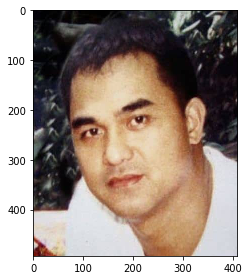

In [0]:
origimg = io.imread('Try.jpg')
io.imshow(origimg)

#Contrast Stretching

In [0]:
img = sm.img_as_float(origimg)
imgmin = img.min()
imgmax = img.max()
print(np.shape(img))

(493, 410, 3)


## Red Channel

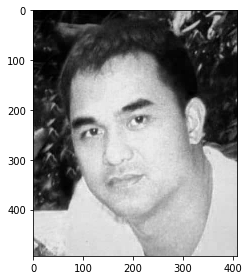

In [0]:
img_red = img[:,:,0]
io.imshow(img_red)
#plt.savefig('Try_CS.png')
plt.imsave('img_red.png', img_red, cmap ='gray')

###Contrast Stretching

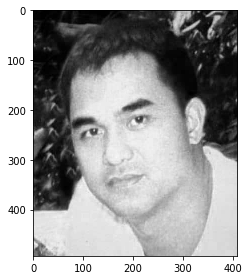

In [0]:
imgmin_red = img_red.min()
imgmax_red = img_red.max()
imgred_cs = (img_red - imgmin_red)/(imgmax_red - imgmin_red)
io.imshow(imgred_cs)
plt.imsave('imgred_cs.png', imgred_cs, cmap ='gray')

##Green Channel

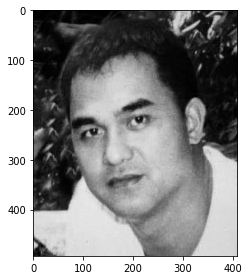

In [0]:
img_green = img[:,:,1]
io.imshow(img_green)
plt.imsave('img_green.png', img_green, cmap ='gray')

###Contrast Stretching

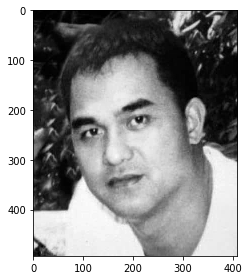

In [0]:
imgmin_green = img_green.min()
imgmax_green = img_green.max()
imggreen_cs = (img_green - imgmin_green)/(imgmax_green - imgmin_green)
io.imshow(imggreen_cs)
plt.imsave('imggreen_cs.png', imggreen_cs, cmap ='gray')

##Blue Channel

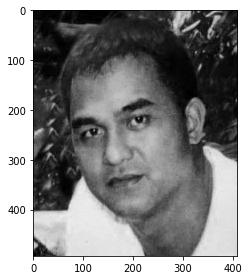

In [0]:
img_blue = img[:,:,2]
io.imshow(img_blue)
plt.imsave('img_blue.png', img_blue, cmap ='gray')

###Contrast Stretching

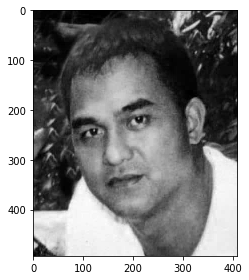

In [0]:
imgmin_blue = img_blue.min()
imgmax_blue = img_blue.max()
imgblue_cs = (img_blue - imgmin_blue)/(imgmax_blue - imgmin_blue)
io.imshow(imgblue_cs)
plt.imsave('imgblue_cs.png', imgblue_cs, cmap ='gray')

Minimum Pixel Value :  0.0 Maximum Pixel Value : 0.984313725490196
Minimum Red Pixel Value :  0.0 Maximum Red Pixel Value : 0.984313725490196
Minimum Green Pixel Value :  0.0 Maximum Green Pixel Value : 0.9215686274509803
Minimum Blue Pixel Value :  0.0 Maximum Blue Pixel Value : 0.9411764705882353


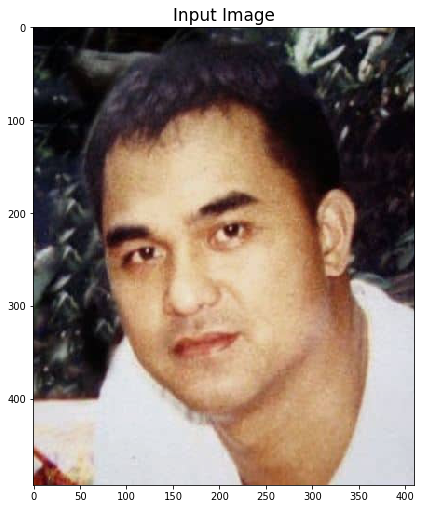

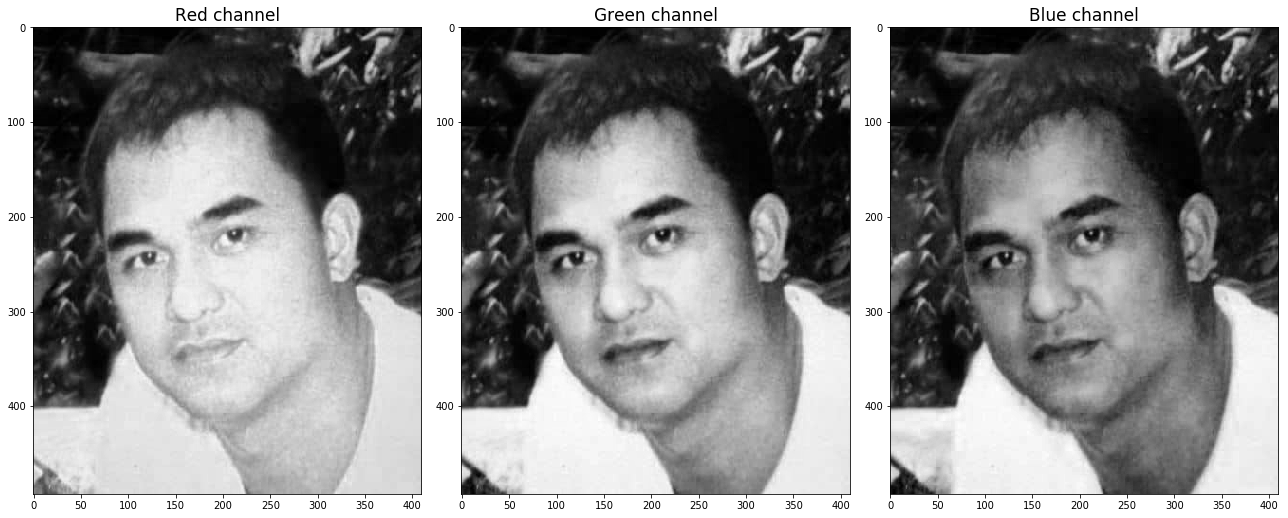

In [0]:
print('Minimum Pixel Value : ', imgmin, 'Maximum Pixel Value :', imgmax)
print('Minimum Red Pixel Value : ', imgmin_red, 'Maximum Red Pixel Value :', imgmax_red)
print('Minimum Green Pixel Value : ', imgmin_green, 'Maximum Green Pixel Value :', imgmax_green)
print('Minimum Blue Pixel Value : ', imgmin_blue, 'Maximum Blue Pixel Value :', imgmax_blue)

#plt.style.use('dark_background')
plt.figure(figsize=[6,15])
plt.rcParams['axes.titlesize'] = 17
io.imshow(img)
plt.title('Input Image')
plt.show()

plt.figure(figsize=[18,15])
plt.subplot(131)
io.imshow(imgred_cs)
plt.title('Red channel')
plt.subplot(132)
io.imshow(imggreen_cs)
plt.title('Green channel')
plt.subplot(133)
io.imshow(imgblue_cs)
plt.title('Blue channel')
plt.show()

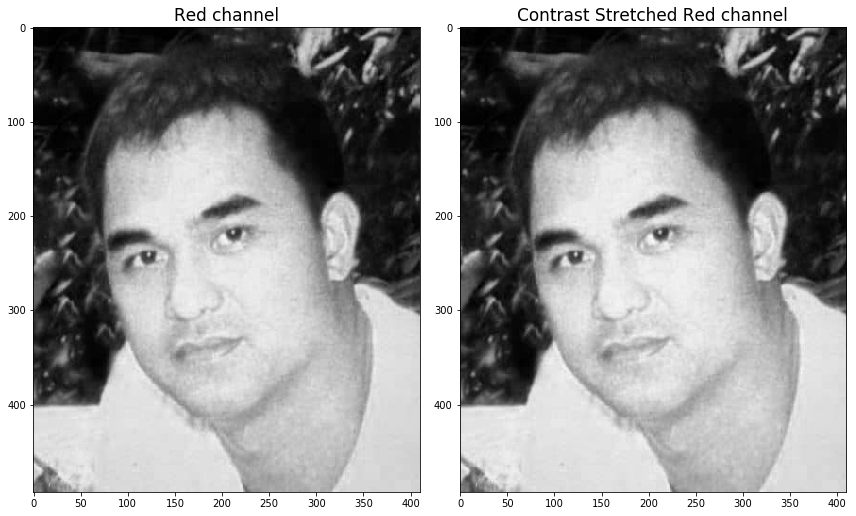

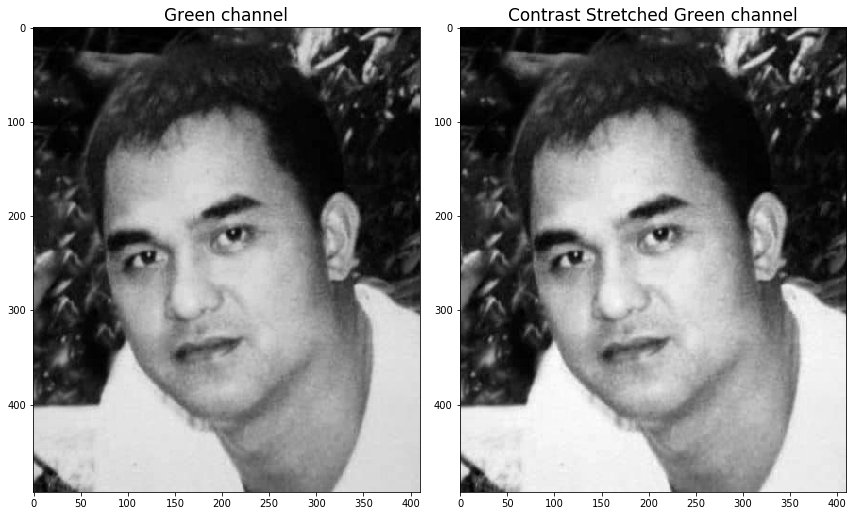

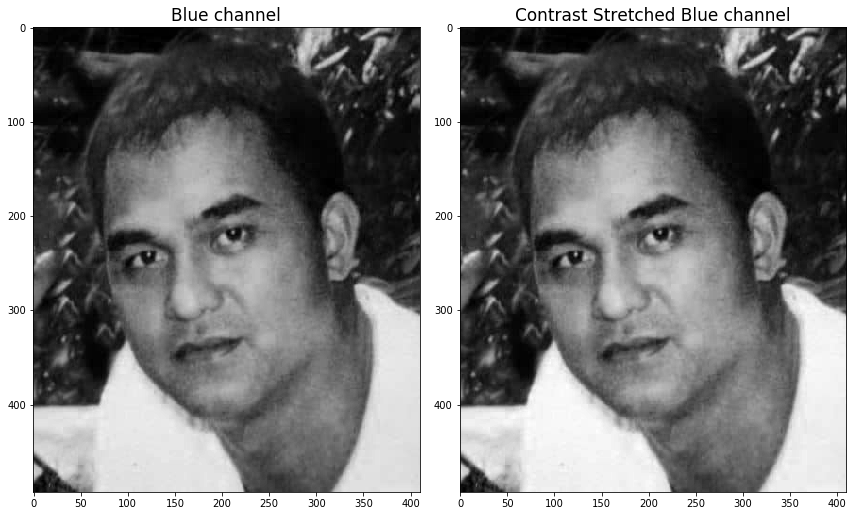

In [0]:
plt.figure(figsize=[12,15])
plt.subplot(121)
io.imshow(img_red)
plt.title('Red channel')
plt.subplot(122)
io.imshow(imgred_cs)
plt.title('Contrast Stretched Red channel')
plt.imsave('imgblue_cs.png', imgblue_cs, cmap ='gray')
plt.show()

plt.figure(figsize=[12,15])
plt.subplot(121)
io.imshow(img_green)
plt.title('Green channel')
plt.subplot(122)
io.imshow(imggreen_cs)
plt.title('Contrast Stretched Green channel')
plt.show()

plt.figure(figsize=[12,15])
plt.subplot(121)
io.imshow(img_blue)
plt.title('Blue channel')
plt.subplot(122)
io.imshow(imgblue_cs)
plt.title('Contrast Stretched Blue channel')
plt.show()

##Overlaying Contrast Stretched Channels

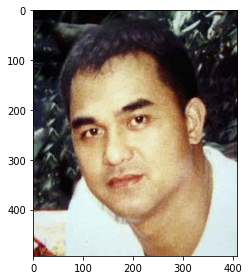

In [0]:
img_CS = np.zeros([np.shape(img)[0],np.shape(img)[1],3], dtype = float)
img_CS[:,:,0] = imgred_cs
img_CS[:,:,1] = imggreen_cs
img_CS[:,:,2] = imgblue_cs
io.imshow(img_CS)
plt.savefig('Try_CS.png')
plt.imsave('Try_CS2.png', img_CS)

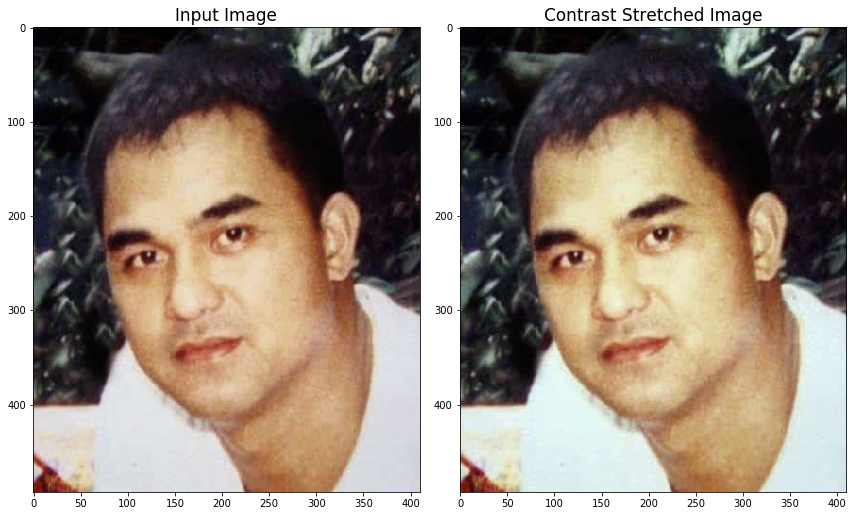

In [0]:
plt.figure(figsize=[12,15])
plt.subplot(121)
io.imshow(img)
plt.title('Input Image')
plt.subplot(122)
io.imshow(img_CS)
plt.title('Contrast Stretched Image')
plt.savefig('Comp_CS.png')
plt.show()

In [0]:
CS_red = img_CS[:,:,0]
CS_green = img_CS[:,:,1]
CS_blue = img_CS[:,:,2]
alpha = 30

In [0]:
blurred_red = ndimage.gaussian_filter(CS_red, 3)
filter_blurred_red = ndimage.gaussian_filter(blurred_red, 1)
sharpened_red = blurred_red + alpha * (blurred_red - filter_blurred_red)

In [0]:
blurred_green = ndimage.gaussian_filter(CS_green, 3)
filter_blurred_green = ndimage.gaussian_filter(blurred_green, 1)
sharpened_green = blurred_green + alpha * (blurred_green - filter_blurred_green)

In [0]:
blurred_blue = ndimage.gaussian_filter(CS_blue, 3)
filter_blurred_blue = ndimage.gaussian_filter(blurred_blue, 1)
sharpened_blue = blurred_blue + alpha * (blurred_blue - filter_blurred_blue)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


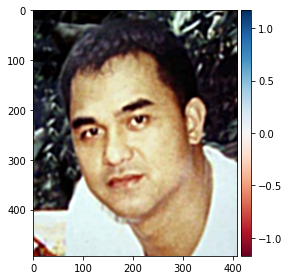

In [0]:
CS_sharp = np.zeros([np.shape(img_CS)[0],np.shape(img_CS)[1],3], dtype = float)
CS_sharp[:,:,0] = sharpened_red
CS_sharp[:,:,1] = sharpened_green
CS_sharp[:,:,2] = sharpened_blue
io.imshow(CS_sharp)
plt.savefig('CS_Sharp.png')
plt.imsave('CS_Sharp2.png', CS_sharp)

#Gray World

In [0]:
Rave = img_red.mean()
Gave = img_green.mean()
Bave = img_blue.mean() 
print('Red average =', Rave)
print('Green average =', Gave)
print('Blue average =', Bave)

Red average = 0.5161865155699643
Green average = 0.43758328701292026
Blue average = 0.38722202659325244


In [0]:
RGW = img_red/Rave
GGW = img_green/Gave
BGW = img_blue/Bave

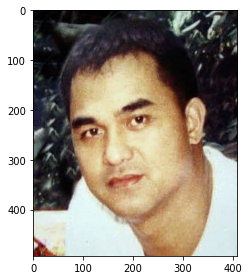

In [0]:
img_GWA = np.zeros([np.shape(img)[0],np.shape(img)[1],3], dtype = float)
img_GWA[:,:,0] = RGW/np.max(RGW)
img_GWA[:,:,1] = GGW/np.max(GGW)
img_GWA[:,:,2] = BGW/np.max(BGW)
io.imshow(img_GWA)
plt.savefig('Try_GWA.png')
plt.imsave('Try_GWA2.png', img_GWA)

In [0]:
img_GWA[:,:,0]

array([[0.33596838, 0.33596838, 0.34387352, ..., 0.39920949, 0.41501976,
        0.44268775],
       [0.33596838, 0.34387352, 0.34782609, ..., 0.39920949, 0.41501976,
        0.44664032],
       [0.34387352, 0.34782609, 0.35177866, ..., 0.39920949, 0.41897233,
        0.44664032],
       ...,
       [0.47035573, 0.45454545, 0.43478261, ..., 0.59683794, 0.60079051,
        0.64031621],
       [0.77075099, 0.75494071, 0.7312253 , ..., 0.77865613, 0.76679842,
        0.7826087 ],
       [0.94071146, 0.92094862, 0.90118577, ..., 0.88537549, 0.86166008,
        0.86166008]])

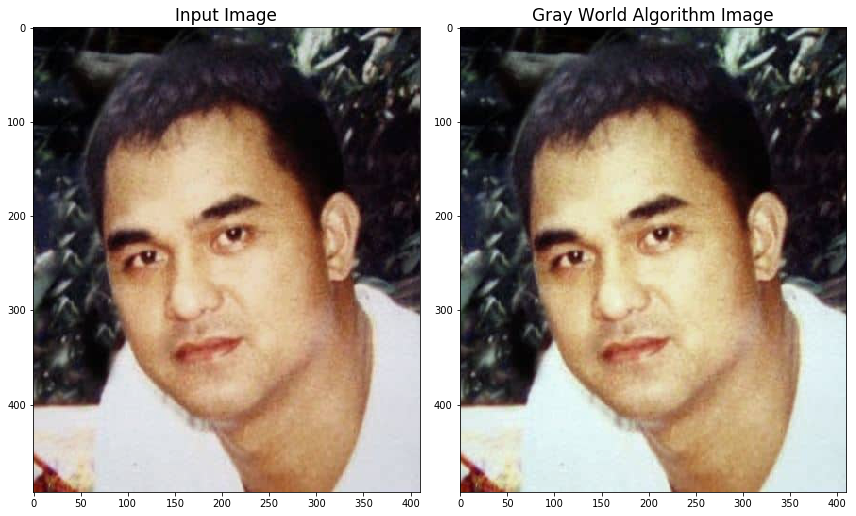

In [0]:
plt.figure(figsize=[12,15])
plt.subplot(121)
io.imshow(img)
plt.title('Input Image')
plt.subplot(122)
io.imshow(img_GWA)
plt.title('Gray World Algorithm Image')
plt.savefig('Try_GWA_Comp.png')
plt.show()

#White Patch 

/usr/local/lib/python3.6/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:75: UserWarning: Low image data range; displaying image with stretched contrast.
  warn("Low image data range; displaying image with "


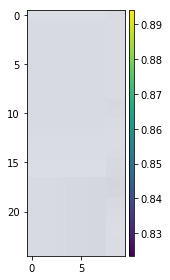

In [0]:
#img_WP = img[334:350,574:611,:]
img_WP = img[375:400,400:450,:]
io.imshow(img_WP)

In [0]:
imgWP_red = img_WP[:,:,0]
imgWP_green = img_WP[:,:,1]
imgWP_blue = img_WP[:,:,2]

In [0]:
Rw = imgWP_red.mean()
Gw = imgWP_green.mean()
Bw = imgWP_blue.mean()

In [0]:
RWB = img_red/Rw
GWB = img_green/Gw
BWB = img_blue/Bw

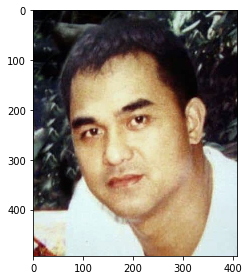

In [0]:
img_GWP = np.zeros([np.shape(img)[0],np.shape(img)[1],3], dtype = float)
img_GWP[:,:,0] = RWB/np.max(RWB)
img_GWP[:,:,1] = GWB/np.max(GWB)
img_GWP[:,:,2] = BWB/np.max(BWB)
io.imshow(img_GWP)
plt.savefig('Try_GWP.png')
plt.imsave('Try_GWP2.png', img_GWP)

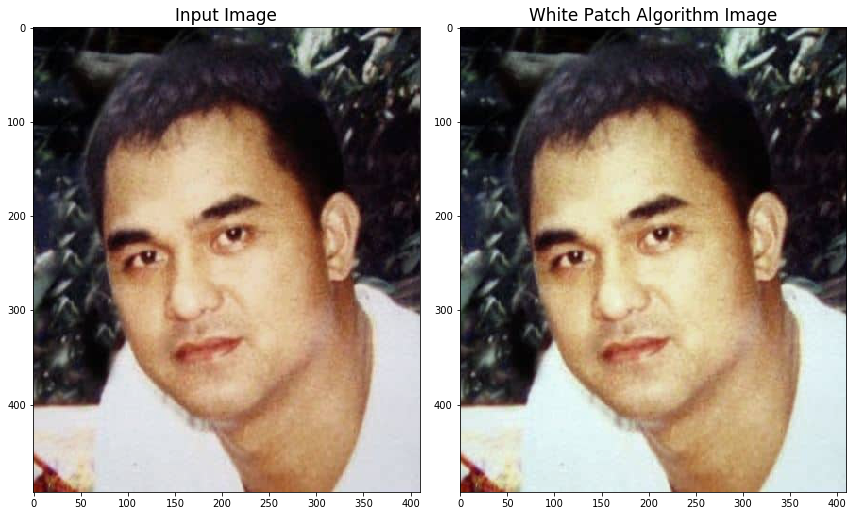

In [0]:
plt.figure(figsize=[12,15])
plt.subplot(121)
io.imshow(img)
plt.title('Input Image')
plt.subplot(122)
io.imshow(img_GWP)
plt.title('White Patch Algorithm Image')
plt.show()

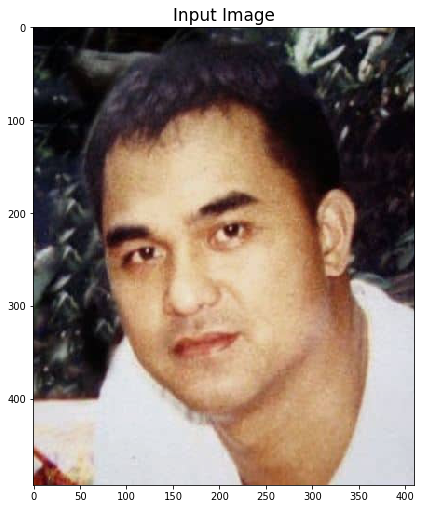

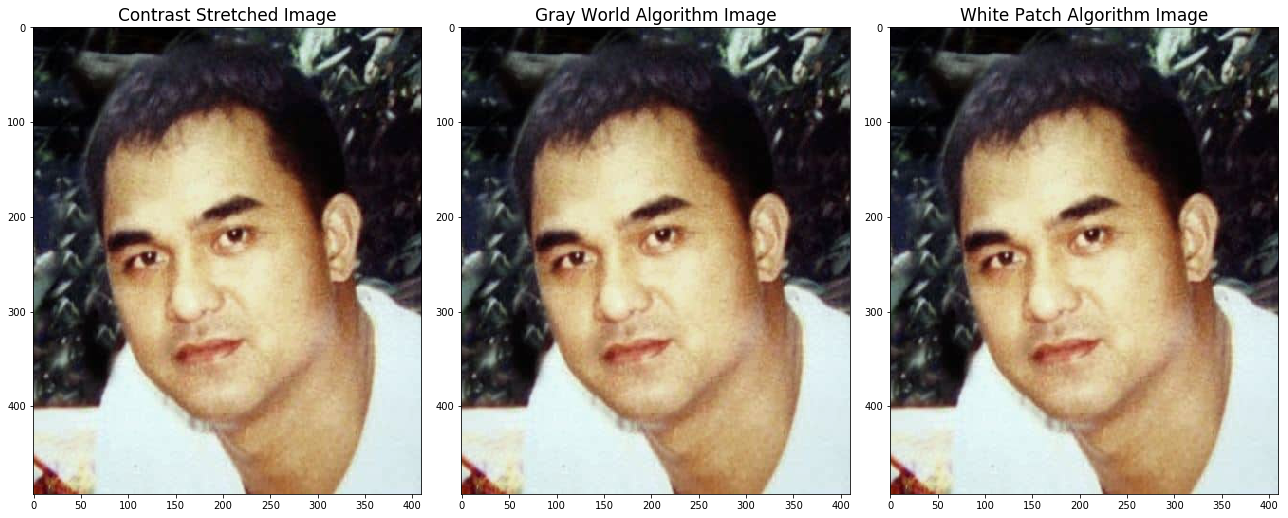

In [0]:
plt.figure(figsize = [6,15])
io.imshow(img)
plt.title('Input Image')
plt.show()

plt.figure(figsize=[18,15])
plt.subplot(131)
io.imshow(img_CS)
plt.title('Contrast Stretched Image')
plt.subplot(132)
io.imshow(img_GWA)
plt.title('Gray World Algorithm Image')
plt.subplot(133)
io.imshow(img_GWP)
plt.title('White Patch Algorithm Image')
plt.savefig('Comparison.png')
plt.show()